# Welcome to your first Image Processing Lab!
## For this introductory session, we will review some of the basics of Python and some fundamental Image Processing notions.


## <font color=blue>1. Python Basics</font>

In [1]:
# Defining variables
a = 5
b = 2
c = 10.0
d = 'string'

# Basic operations
result1 = a+b
print(result1)

result2 = a+c
print(result2)

result3 = a*b
print(result3)

result4 = a/b
print(result4)

result5 = a//b
print(result5)

result6 = c/b
print(result6)

result_string = 'This is a ' + d
print(result_string)

# Data structures - lists
l1 = [1,2,3,4]

7
15.0
10
2.5
2
5.0
This is a string


Conditionals and loops are essential in programming. One of Python's main targets is writing tidy code. It forces the user to indent every time he enters a block (conditional, loop, class definition, functions, etc.) and unindent when he wants to exit the block. Other than that, the syntax is easy to comprehend:


In [ ]:
# If example
a = 5
if a > 4:
    print('OK')
else:
    print('Not OK')

# For loop example
for i in range(5):
    print(i)

## <font color=blue>2. Additional libraries and special data structures</font>
In order to process images, we will need some extra libraries. These are:<br><br> -  Numpy; this is the library of choice when it comes to scientific computing in Python. It allows us to create proper arrays and use linear algebra to manipulate them.<br> -   Scikit-image; an image processing library. We will use it for basic utility functions.<br> -   Matplotlib; a 2D plotting library; it will allow us to show images (more conveniently than Scikit-image) and plot graphs.
We will need to get more in depth with Numpy, since it will be the most used library. Its base data structure (the numpy.array) is similar in appearance with the default Python lists. The main drawback of using lists is that regular linear algebra operations (add, subtract, multiply, divide, dot-product) are not defined on them.<br>The easiest way to illustrate how Numpy arrays work is to first consider the single dimension, vector, case.

In [ ]:
# We need to import the libraries in order to use them
import numpy as np
from skimage import io,util,color #io, util and color are modules in the skimage package
import matplotlib.pyplot as plt

# Special data strucutres - Numpy arrays
# Let's define our vector, 'vect', and apply some basic operations on it
vect = np.array([1,2,3,4])
print('vect = ',vect)

# Addition of a scalar (similar for subtraction)
add_vect = vect + 1

print('Addition of a scalar\n{} + 1 = '.format(vect),add_vect)

# Multiplication by a scalar value (similar for division)
mult_vect = vect * 3.5
print('Multiplication by a scalar value\n{} * 3.5 = '.format(vect),mult_vect)

# Numpy allows us to broadcast operations on the entirety of the vector. 
# Let's see how this works by first creating a second (same-sized) vector
vect_2 = np.array([11,12,13,14])
print('vect_2 = ',vect_2)

# Addition of a second vector
add_vect = vect + vect_2
print('Addition of a second vector\n{} + {} = '.format(vect,vect_2),add_vect)

# Multiplication of two same-sized vectors
mult_vect = vect * vect_2
print('Multiplication of two same-sized vectors\n{} * {} = '.format(vect,vect_2),mult_vect) 
# We can see that multiplying two vectors leads to a element-wise multiplication

# Numpy allows us to compute the dot product (inner product) of two arrays
dot_prod = np.dot(vect,vect_2)
print('Dot product of two vectors\n{} .* {} = '.format(vect,vect_2),dot_prod)


Now that the basics are highlighted, the discussion will be extended to the 2D case (matrices):

In [ ]:
# Import numpy
import numpy as np

#First, define the matrix
mat = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("mat =\n",mat)

# The same scalar operations we used for vectors can be applied to a matrix
add_mat = mat + 1
mult_mat = mat * 2
print('Addition\n{} + 1 = \n'.format(mat),add_mat)
print('Multiplication\n{} * 2 = \n'.format(mat),mult_mat)

# When adding/multiplying two matrices, the result is a element-wise addition/multiplication.
# However, the dot product operation leads to a matrix multiplication.
mat2 = np.array([[1,1,1],[2,2,2],[3,3,3]])
dot_prod = np.dot(mat,mat2)
print('Dot product(matrix multiplication) of two matrices:\n{}.*\n{} = \n'.format(mat,mat2),dot_prod)

print(mat*mat2)

Sometimes, the programmer needs to acces only certain elements of an array. What needs to be remembered is that indexing starts from 0! Also, when specifying an interval, the value following the colon (:) is not included. These rules can be applied to lists as well, not only Numpy arrays.<br>Here are some examples of accesing data from an array:

In [ ]:
# Import numpy
import numpy as np

mat = np.array([[1,2,3],[4,5,6],[7,8,9]])
# Get the value from the second row, second column (5):
print(mat[1,1]) # idexing starts from 0

# Get the values from the last two rows and columns (5,6,8,9)
print(mat[1:3,1:3]) # notice that the value following the colon (:) is not included in the interval

# Get all the values from the first row
print(mat[0,:])

In certain situations, we need to alter all values which meet a certain requirement. It is not necessary to loop the whole array, if we use numpy indexing. Let's see it at work:

In [ ]:
# Import numpy
import numpy as np

mat = np.array([[1,2,3],[4,5,6],[7,8,9]])
mat[mat >= 5] = 0
print(mat)

Other useful functions and methods from Numpy:

In [ ]:
import numpy as np

# initializing an array
vect = np.array ( [ 0, 1, 2, 3, 4 ] )
print(vect)
print(type(vect))
print(vect.dtype)
# Minimum/maximum values
print(vect.max())
print(vect.min())
# Initializing a 2x2 matrix with only 0s inside
#mat = np.zeros([2, 2])
mat = np.ones([10, 5])

print(mat)

In Python you can go through a matrix row by row (instead of element by element). For example:

In [ ]:
v1 = np.array([ [2, 2, 2], [3, 3, 3], [1, 5, 5] ] )
print(v1)
print('\n')
# i is a row in the matrix
for i in v1:
    print(i)
    print('next')

## <font color=blue>3. Image Processing basics</font>
Before starting to study image processing algorithms, some basic concepts must be discussed. A colour image is a *3D array* (rows, columns, channels) containing the <font color=red>Red</font>, <font color=green>Green</font> and <font color=blue>Blue</font> channel values which form each individual pixel.<img src="lena.png"><br> However, we will work on the simplified version of *grayscale* images, (rows and columns only, where <font color=red>Red</font>=<font color=green>Green</font>=<font color=blue>Blue</font>).<br>Image display functions are able to correctly show truecolor image. Grayscale images are treated as *indexed images*. An indexed image consists of an array of values, where each value points to a row in a *colormap*.<br>The colormap is an array with 3 columns, representing the quantities of red, green and blue which make up the color of a pixel.
Let's create and view our own indexed image; note that we import the *matplotlib* library and the *pyplot* submodule separately. It is not necessary, but in most of our labs, we will only need *pyplot*:

(<Figure size 640x480 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x107fe6190>)

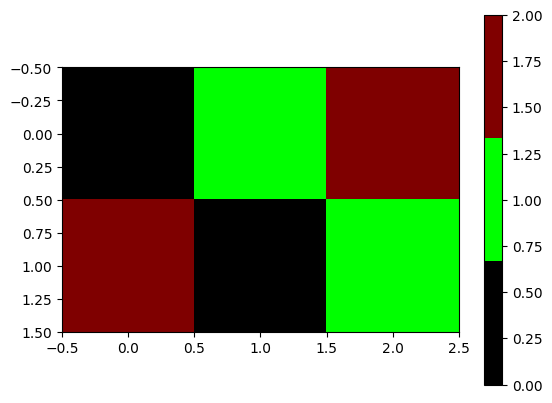

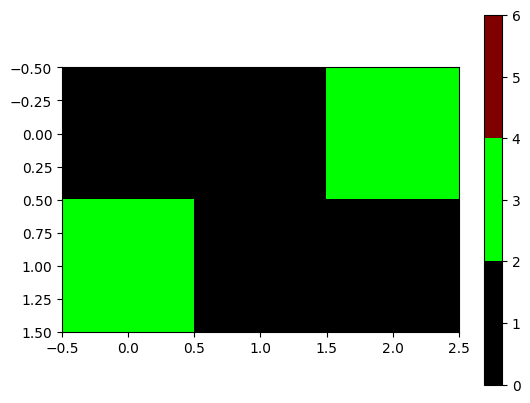

In [1]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Our image
img = np.array([[0,1,2],[2,0,1]])

# Our custom colormap
colormap = np.array([[0.0,0.0,0.0],[0.0,1.0,0.0],[0.5,0.0,0.0]])
colormap = mpl.colors.ListedColormap(colormap)

# imshow looks in the image matrix, gets the minimum and maximum values
# and divides the range of values between minimum and maximum in subintervals. 
# The number of subintervals is equal to the number of colors in the colormap.
# A color is assigned to each subinterval - see the colorbar
plt.figure(), plt.imshow(img, cmap=colormap), plt.colorbar()

# with vmin and vmax, the user can set the minimum and maximul values used by imshow
plt.figure(), plt.imshow(img, cmap=colormap, vmin=0, vmax = 6), plt.colorbar()

Feel free to alter the values and see how the colours change

The next step is to read an image, convert it to grayscale and display it. The colormap used for grayscale images is called, intuitively, "gray".<br>If we look at the data type of the original image and the grayscale one, we will see that it changes from *uint8* to *float64*. 

In [ ]:
# Import skimage and matplotlib
from skimage import io,color
import matplotlib.pyplot as plt

# Image loading
img_orig = io.imread('lena.png')

# Data type of the original image
print('The original image type is:', img_orig.dtype)
print('The shape of the original image is:', img_orig.shape, '\n')

# Displaying the original image
plt.figure(), plt.imshow(img_orig)

# Grayscale conversion
img = color.rgb2gray(img_orig)

# Data type of the grayscale image
print('The grayscale image type us:',img.dtype)
print('The shape of the grayscale image is:', img.shape)

# Displaying the grayscale image
plt.figure(),plt.imshow(img,cmap='gray'), plt.colorbar()

print(img.max())
print(img.min())

# how is the matching done between the float numbers in [0, 1] range and the rows from the colormap? 

## <font color=blue>4. Exercises</font>
4.a) Create a 128 x 128 pixel image and its corresponding colormap with colours which range from black to pure red (the column has the same colour from top to bottom).

In [ ]:
# Import matplotlib, pyplot (separate from matplotlib, since that is the way we will use it), and numpy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# How to create an array filled with zeros
img = np.zeros([128,128])
colormap = np.zeros([128,3])

# Create the image here
    
# Create the colormap here

# Display the image


4.b) Create a 256 x 256 pixel image and its corresponding colormap with colours which range from black to pure red and then to magenta (red + blue).

In [ ]:
# Import relevant libraries

# Create the empty array

# Create the image here

# Create the colormap here

# Display the image
